In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
pd.options.display.float_format = "{:,.2f}".format
import sys
sys.path.append("../")
from src import soporte_ajuste as sa

In [3]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

In [4]:
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Instrucción para visualizar todas las columnas de un dataFrame
pd.set_option('display.max_columns', None)

El modelo de predicción sobre los clusters que construimos en este notebook será para predecir el beneficio, dado por la variale 'Profit'.

'Profit' es nuestra variable respuesta, la cogemos del datafrmae original para insganciar las clases que nos calcularán los modelos de regresión

In [ ]:
df_orig = pd.read_csv('../datos/Global_Superstore.csv', encoding='latin-1')
df_orig.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,"10,024.00",US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,309.65",7,0.00,762.18,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709.39",9,0.10,-288.76,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175.17",9,0.10,919.97,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless","2,892.51",5,0.10,-96.54,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,832.96",8,0.00,311.52,903.04,Critical


In [7]:
df = pd.read_csv('datos/Global_Superstore_clustering.csv', encoding='latin-1', index_col=0)
df.head()



,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_dbscan
0,0.00,0.00,0.00,0.05,0.00,0.52,0.02,0.02,0.19,0.19,0.06,0.00,0.20,0.06,0.00,4.23,1.55,-0.67,4.21,15.83,0.08,-1
1,0.00,0.00,0.00,0.20,0.00,0.30,0.00,0.02,0.06,0.21,0.07,0.00,0.19,0.07,0.00,7.10,2.42,-0.20,-1.82,15.66,0.08,-1
2,0.00,0.00,0.00,0.15,0.00,0.52,0.00,0.01,0.06,0.21,0.07,0.00,0.20,0.07,0.00,10.11,2.42,-0.20,5.11,15.52,0.57,-1
3,0.00,0.00,0.00,0.15,0.00,0.18,0.00,0.00,0.04,0.19,0.22,0.00,0.20,0.07,0.00,5.43,0.67,-0.20,-0.72,15.42,0.57,-1
4,0.00,0.00,0.00,0.05,0.00,0.52,0.00,0.00,0.00,0.09,0.09,0.00,0.20,0.04,0.00,5.30,1.99,-0.67,1.62,15.30,0.08,-1


In [8]:
df["Profit_vr"] = df_orig["Profit"]

In [9]:
df.drop(columns=["Profit"], inplace=True)

In [10]:
df1 = df[df["clusters_dbscan"] == -1] # dataframe con los datos del cluster -1
print(df1.shape[0])
df2 = df[df["clusters_dbscan"] == 0] # dataframe con los datos del cluster 0
print(df2.shape[0])
df3 = df[df["clusters_dbscan"] == 1] # dataframe con los datos del cluster 1
print(df3.shape[0])


4402
37240
9648


## Modelos para el cluster -1

In [11]:
df1 = df1.drop(columns=["clusters_dbscan"])
df1.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Shipping Cost', 'Order Priority', 'Profit_vr'],
      dtype='object')

In [12]:
df1 = df1.drop(columns=['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Product ID'])
     
df1.columns

Index(['Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Shipping Cost', 'Order Priority', 'Profit_vr'],
      dtype='object')

### Decision Tree

In [14]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Profit_vr')

params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='tree', param_grid=params_arbol)

In [15]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.sample(10)

,Real,Predicho,Conjunto,Modelo,Residuos
668,114.97,-229.78,Test,tree,344.76
3304,435.89,294.36,Train,tree,141.53
1402,"-1,672.50","-1,217.51",Test,tree,-454.99
2026,170.40,219.01,Train,tree,-48.61
11245,"2,476.44","2,605.25",Train,tree,-128.81
2343,114.25,70.18,Train,tree,44.07
4453,42.59,70.18,Test,tree,-27.59
2460,142.74,294.36,Train,tree,-151.62
2509,314.81,8.36,Train,tree,306.46
2404,208.56,115.50,Train,tree,93.06


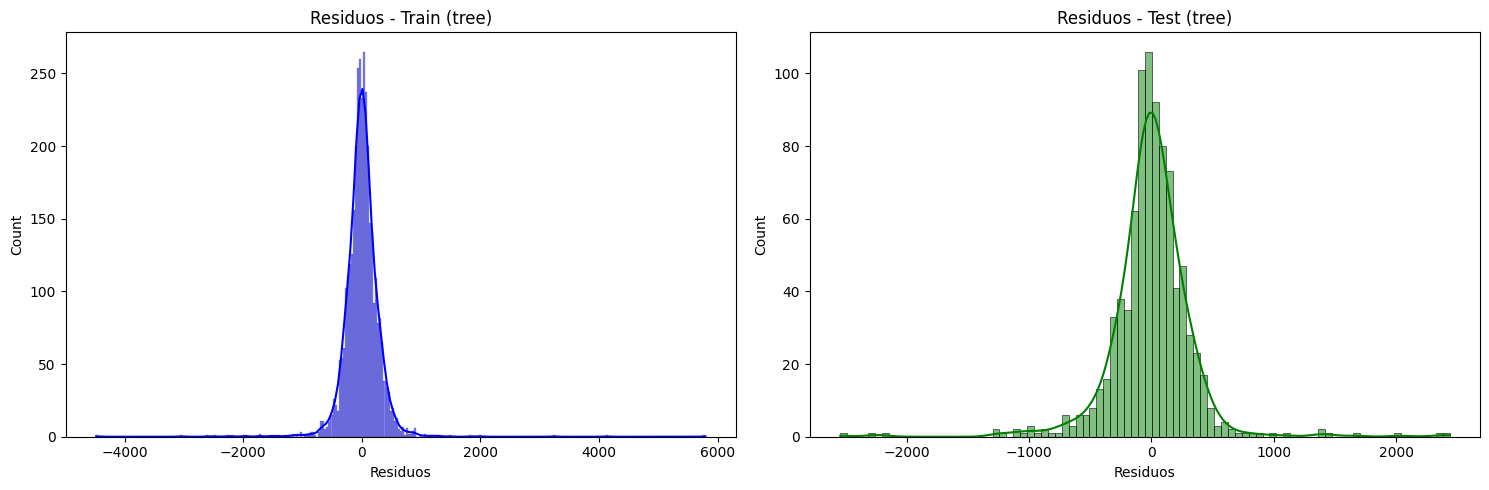

In [16]:
analisis.plot_residuos("tree")

In [17]:

analisis.calcular_metricas("tree")

,train,test
R2,0.66,0.65
MAE,192.07,211.61
MSE,"100,879.77","117,718.61"
RMSE,317.62,343.10


A la vista de los resultados obtenidos, los predichos, la grafica de residuos y el RMSE vemos que la predicción es bastante mala.

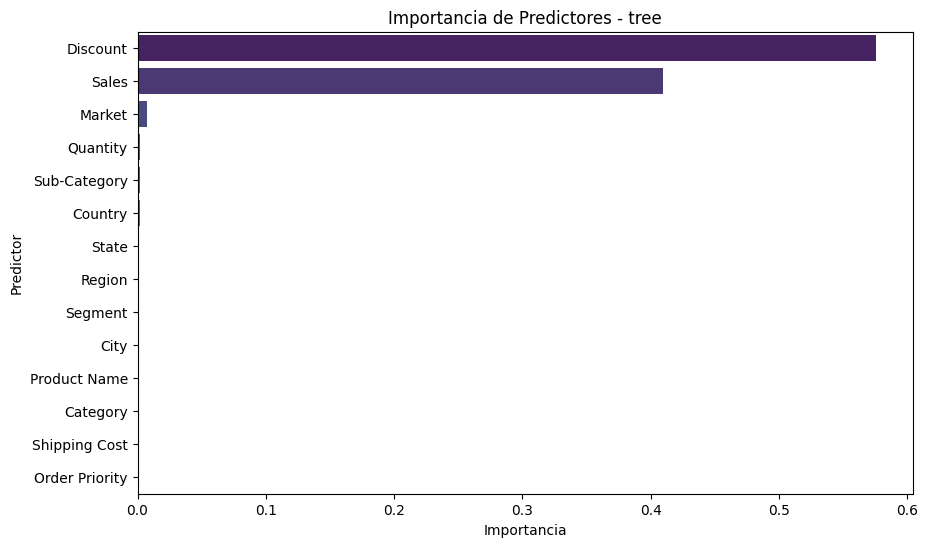

,Predictor,Importancia
11,Discount,0.58
9,Sales,0.41
4,Market,0.01
10,Quantity,0.00
7,Sub-Category,0.00
3,Country,0.00
2,State,0.00
5,Region,0.00
0,Segment,0.00
1,City,0.00


In [18]:
analisis.importancia_predictores("tree")

### Random Forest

In [19]:
# instanciamos la clase de regresión lineal
analisis_random_forest = sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Profit_vr')

params_rf = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [1], 
    'max_leaf_nodes': [30]
}

# llamamos a la función para ajustar el modelo
analisis_random_forest.ajustar_modelo(modelo='random_forest', param_grid=params_rf)

In [20]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_analisis_random_forest = analisis_random_forest.obtener_resultados()
df_resultados_analisis_random_forest.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
1773,314.27,94.61,Train,random_forest,219.66
1220,33.00,124.74,Train,random_forest,-91.74
44,377.24,496.26,Train,random_forest,-119.01


In [21]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.75,0.71
MAE,188.89,208.95
MSE,"72,729.12","97,184.69"
RMSE,269.68,311.74


Las métricas mejoran algo pero siguen siendo bastante malas y se aprecia overfitting.

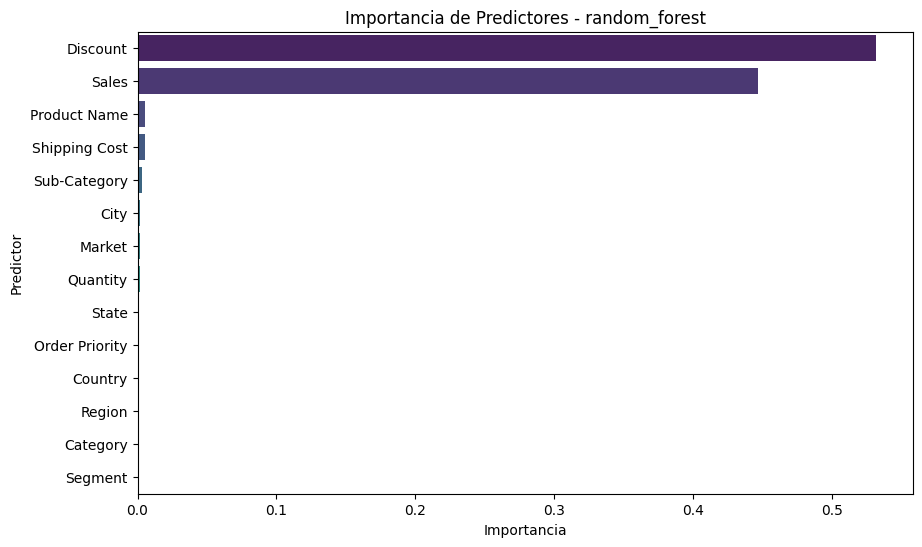

,Predictor,Importancia
11,Discount,0.53
9,Sales,0.45
8,Product Name,0.01
12,Shipping Cost,0.01
7,Sub-Category,0.00
1,City,0.00
4,Market,0.00
10,Quantity,0.00
2,State,0.00
13,Order Priority,0.00


In [22]:
analisis_random_forest.importancia_predictores("random_forest")


### Gradient Boost

In [23]:
# instanciamos la clase de regresión lineal
analisis_gradient_boosting = sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Profit_vr')

params_gb = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1,]
}

# llamamos a la función para ajustar el modelo
analisis_gradient_boosting.ajustar_modelo(modelo='gradient_boosting',param_grid = params_gb)

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient_boosting = analisis_gradient_boosting.obtener_resultados()
df_resultados_gradient_boosting.head()

,Real,Predicho,Conjunto,Modelo,Residuos
1773,314.27,165.33,Train,gradient_boosting,148.95
1220,33.00,168.55,Train,gradient_boosting,-135.55
44,377.24,358.91,Train,gradient_boosting,18.33
289,"-1,331.65",-110.68,Train,gradient_boosting,"-1,220.97"
2713,-106.47,179.58,Train,gradient_boosting,-286.05


In [24]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")


,train,test
R2,0.41,0.36
MAE,264.45,287.76
MSE,"173,457.32","217,851.03"
RMSE,416.48,466.75


las métricas han empeorado con respecto a las anteriores.

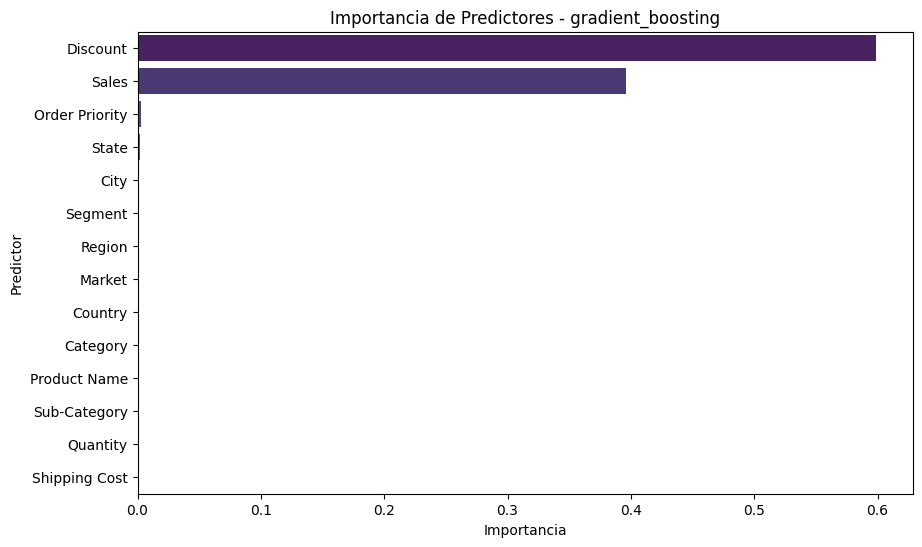

,Predictor,Importancia
11,Discount,0.60
9,Sales,0.40
13,Order Priority,0.00
2,State,0.00
1,City,0.00
0,Segment,0.00
5,Region,0.00
4,Market,0.00
3,Country,0.00
6,Category,0.00


In [25]:
analisis_gradient_boosting.importancia_predictores("gradient_boosting")


### Xgboost

In [26]:
analisis_xgboost= sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Profit_vr')
params_xgb = {
    'n_estimators': [50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 2],  
    'subsample': [0.8, 1.0],        
    'colsample_bytree': [0.8, 1.0]  
}

# llamamos a la función para ajustar el modelo
analisis_xgboost.ajustar_modelo(modelo='xgboost', param_grid=params_xgb)

In [27]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = analisis_xgboost.obtener_resultados()
df_resultados_xgboost.head()

,Real,Predicho,Conjunto,Modelo,Residuos
1773,314.27,200.83,Train,xgboost,113.44
1220,33.00,104.64,Train,xgboost,-71.64
44,377.24,449.59,Train,xgboost,-72.34
289,"-1,331.65",-838.05,Train,xgboost,-493.60
2713,-106.47,277.55,Train,xgboost,-384.02


In [28]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.83,0.71
MAE,166.13,203.63
MSE,"50,079.44","99,189.85"
RMSE,223.78,314.94


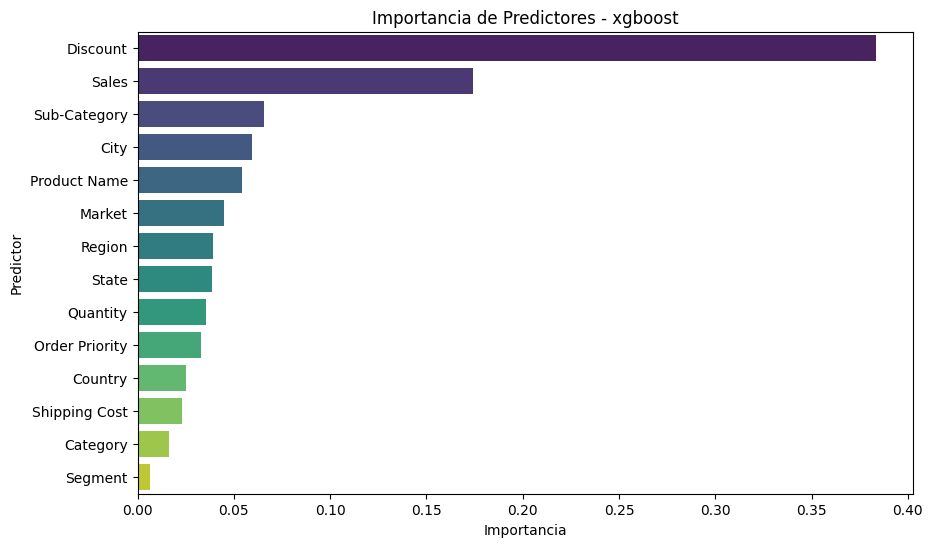

,Predictor,Importancia
11,Discount,0.38
9,Sales,0.17
7,Sub-Category,0.07
1,City,0.06
8,Product Name,0.05
4,Market,0.04
5,Region,0.04
2,State,0.04
10,Quantity,0.04
13,Order Priority,0.03


In [29]:
analisis_xgboost.importancia_predictores("xgboost")


Las métricas siguen siendo malas y con un elevado overfitting

Para comparar los modelos, vemos los estadísticos de la variable respuesta

In [68]:
df1["Profit_vr"].describe() 

count    4,402.00
mean       134.83
std        550.24
min     -6,599.98
25%        -84.11
50%        126.32
75%        364.39
max      8,399.98
Name: Profit_vr, dtype: float64

El mejor modelo es el Random Forest, pero un RMSE de 311 es malo para predecir un Beneficio que de media vale 134. Aunque es cierto que el rango de valroes es altísimo (tanto negativos como positivos) de 15000 de diferenci entre maximo y minimo. Comparado así, la predicción no es tan mala. En todo caso no es un modelo preciso para calcular el beneficio.

La conclusión es evidente, y es que los modelos de regresión predicen muy mal los beneficios en el cluster -1 obtenido con el método Dbscan. Recordemos que los datos  de este cluster eran aquellos con un mayor numero de ventas ("Sales"), de los que se pidió mayor cantidad ("Quantity"), con mayor beneficio ("Profit") y con mayor coste de envío asociado ("Shipping Cost"). 

Es el cluster menos numeroso de los 3, quizá los datos de los otros dos sean más representativos o simplemente al ser más numero de datos permitan a los algoritmos de regresión predecir mejor. Lo comprobamos a continuación.

## Modelos para el cluster 0

In [30]:
df2 = df2.drop(columns=["clusters_dbscan"])
df2.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Shipping Cost', 'Order Priority', 'Profit_vr'],
      dtype='object')

In [31]:
df2 = df2.drop(columns=['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Product ID'])
     
df2.columns

Index(['Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Shipping Cost', 'Order Priority', 'Profit_vr'],
      dtype='object')

### Decision Tree

In [33]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df2, variable_dependiente='Profit_vr')

params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='tree', param_grid=params_arbol)

In [34]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.sample(10)

,Real,Predicho,Conjunto,Modelo,Residuos
44936,5.43,3.32,Test,tree,2.11
23108,47.70,42.22,Train,tree,5.48
30569,14.94,7.88,Train,tree,7.06
13589,-15.38,21.73,Train,tree,-37.11
26319,8.48,31.65,Train,tree,-23.17
27310,-4.48,19.37,Train,tree,-23.85
7324,31.32,94.47,Train,tree,-63.15
41831,9.06,7.88,Train,tree,1.18
16472,95.70,60.98,Train,tree,34.72
22783,39.33,42.22,Train,tree,-2.89


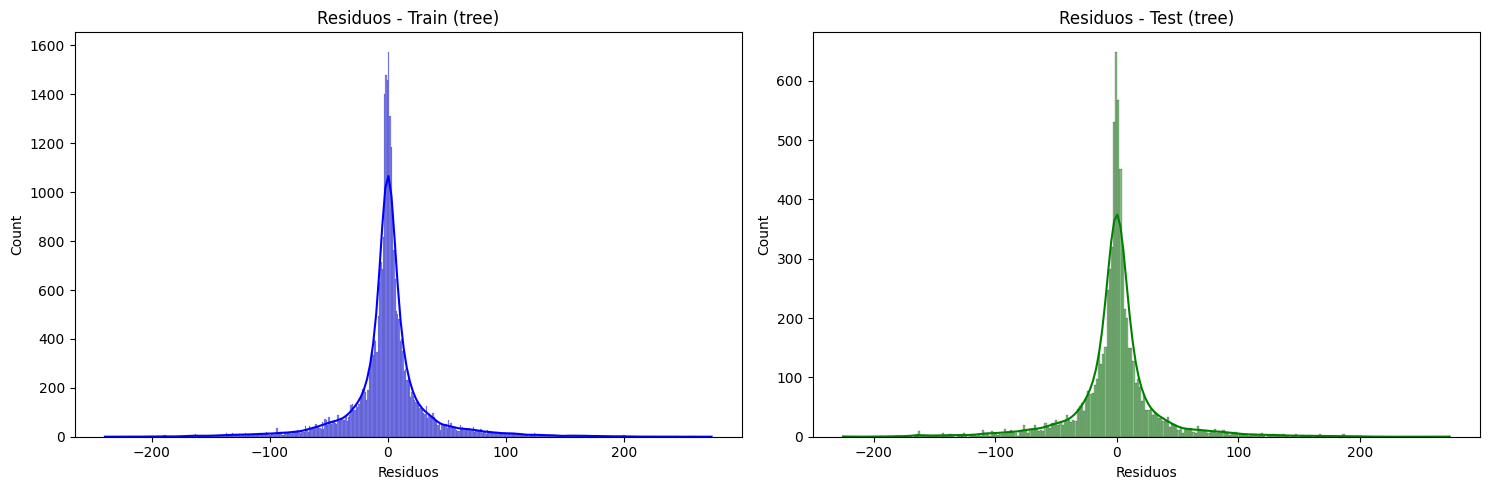

In [35]:
analisis.plot_residuos("tree")

In [36]:

analisis.calcular_metricas("tree")

,train,test
R2,0.54,0.51
MAE,20.31,20.64
MSE,"1,301.88","1,349.27"
RMSE,36.08,36.73


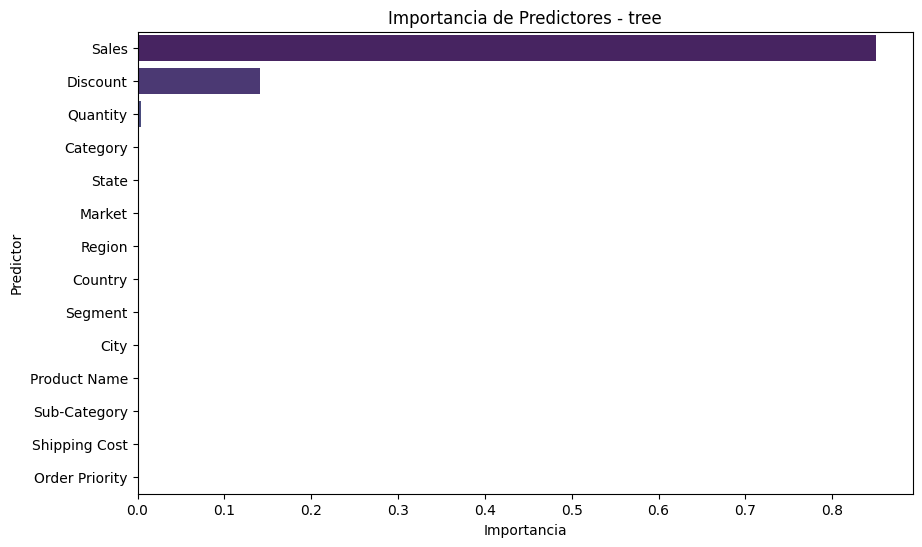

,Predictor,Importancia
9,Sales,0.85
11,Discount,0.14
10,Quantity,0.00
6,Category,0.00
2,State,0.00
4,Market,0.00
5,Region,0.00
3,Country,0.00
0,Segment,0.00
1,City,0.00


In [37]:
analisis.importancia_predictores("tree")

### Random Forest

In [38]:
# instanciamos la clase de regresión lineal
analisis_random_forest = sa.AnalisisModelosRegresion(dataframe=df2, variable_dependiente='Profit_vr')

params_rf = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [1], 
    'max_leaf_nodes': [30]
}

# llamamos a la función para ajustar el modelo
analisis_random_forest.ajustar_modelo(modelo='random_forest', param_grid=params_rf)

In [39]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_analisis_random_forest = analisis_random_forest.obtener_resultados()
df_resultados_analisis_random_forest.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
34294,4.14,16.02,Train,random_forest,-11.88
43957,28.32,24.35,Train,random_forest,3.97
26906,44.16,24.08,Train,random_forest,20.08


In [40]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.55,0.52
MAE,20.08,20.37
MSE,"1,271.51","1,315.54"
RMSE,35.66,36.27


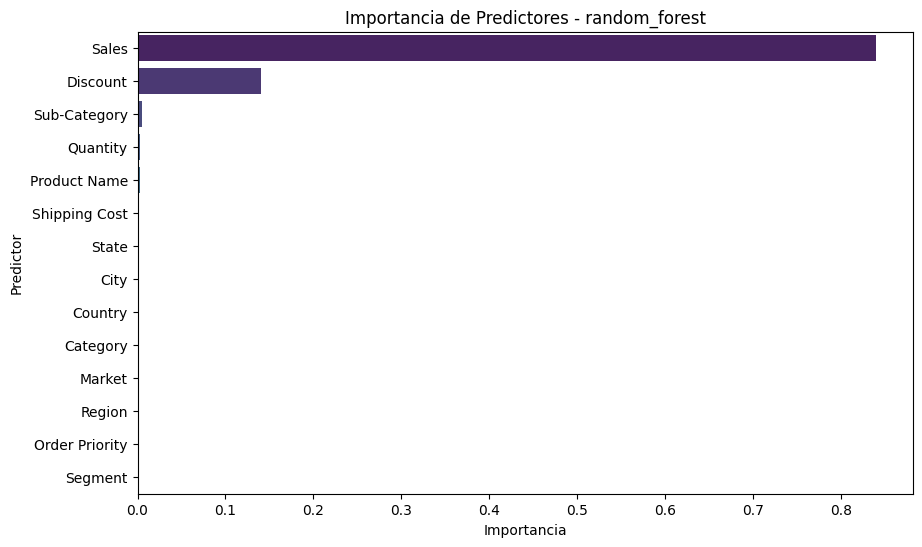

,Predictor,Importancia
9,Sales,0.84
11,Discount,0.14
7,Sub-Category,0.01
10,Quantity,0.00
8,Product Name,0.00
12,Shipping Cost,0.00
2,State,0.00
1,City,0.00
3,Country,0.00
6,Category,0.00


In [41]:
analisis_random_forest.importancia_predictores("random_forest")


### Gradient Boost

In [42]:
# instanciamos la clase de regresión lineal
analisis_gradient_boosting = sa.AnalisisModelosRegresion(dataframe=df2, variable_dependiente='Profit_vr')

params_gb = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1,]
}

# llamamos a la función para ajustar el modelo
analisis_gradient_boosting.ajustar_modelo(modelo='gradient_boosting',param_grid = params_gb)

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient_boosting = analisis_gradient_boosting.obtener_resultados()
df_resultados_gradient_boosting.head()

,Real,Predicho,Conjunto,Modelo,Residuos
34294,4.14,25.66,Train,gradient_boosting,-21.52
43957,28.32,29.30,Train,gradient_boosting,-0.98
26906,44.16,29.30,Train,gradient_boosting,14.86
14520,112.08,59.51,Train,gradient_boosting,52.57
42916,4.83,22.69,Train,gradient_boosting,-17.86


In [43]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")


,train,test
R2,0.33,0.32
MAE,27.59,27.26
MSE,"1,916.01","1,863.08"
RMSE,43.77,43.16


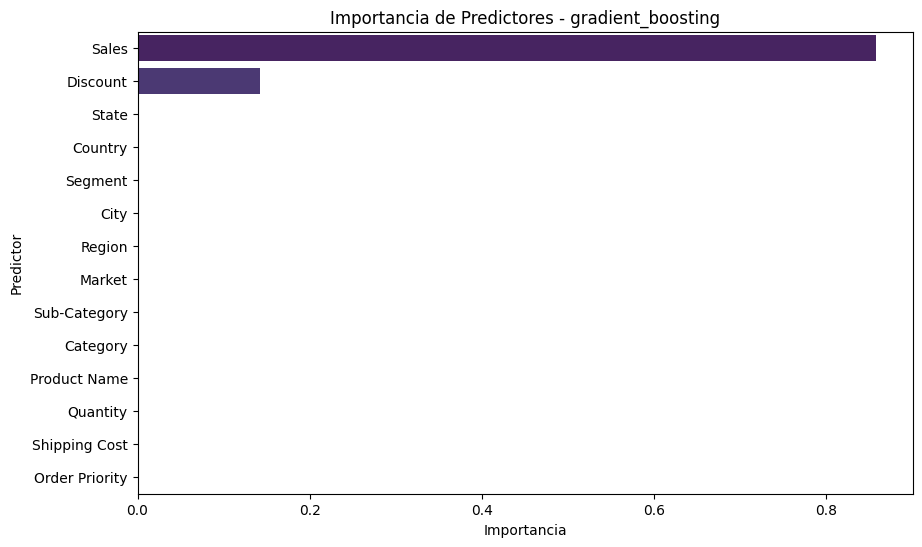

,Predictor,Importancia
9,Sales,0.86
11,Discount,0.14
2,State,0.00
3,Country,0.00
0,Segment,0.00
1,City,0.00
5,Region,0.00
4,Market,0.00
7,Sub-Category,0.00
6,Category,0.00


In [44]:
analisis_gradient_boosting.importancia_predictores("gradient_boosting")


### Xgboost

In [45]:
analisis_xgboost= sa.AnalisisModelosRegresion(dataframe=df2, variable_dependiente='Profit_vr')
params_xgb = {
    'n_estimators': [50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 2],  
    'subsample': [0.8, 1.0],        
    'colsample_bytree': [0.8, 1.0]  
}

# llamamos a la función para ajustar el modelo
analisis_xgboost.ajustar_modelo(modelo='xgboost', param_grid=params_xgb)

In [46]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = analisis_xgboost.obtener_resultados()
df_resultados_xgboost.head()

,Real,Predicho,Conjunto,Modelo,Residuos
34294,4.14,14.81,Train,xgboost,-10.67
43957,28.32,23.61,Train,xgboost,4.71
26906,44.16,23.09,Train,xgboost,21.07
14520,112.08,101.73,Train,xgboost,10.35
42916,4.83,4.77,Train,xgboost,0.06


In [47]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.58,0.54
MAE,19.46,19.89
MSE,"1,207.51","1,275.68"
RMSE,34.75,35.72


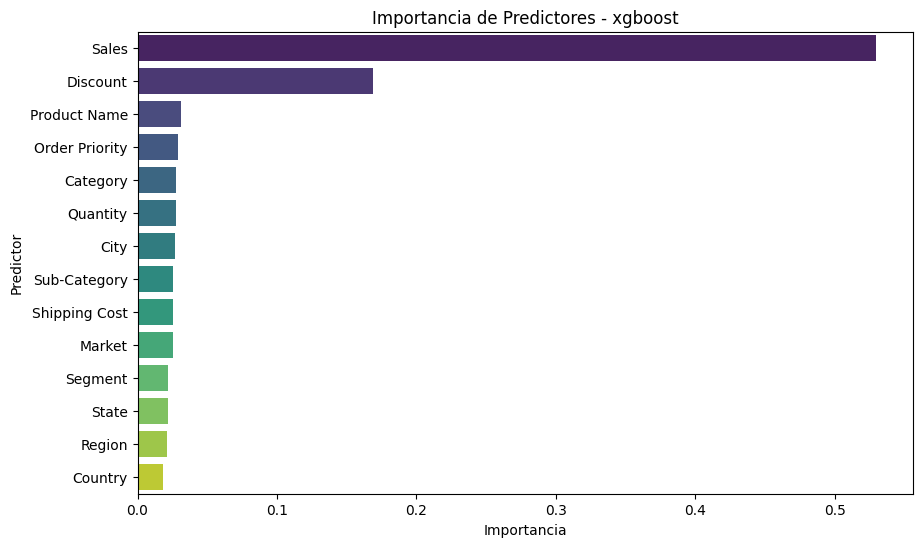

,Predictor,Importancia
9,Sales,0.53
11,Discount,0.17
8,Product Name,0.03
13,Order Priority,0.03
6,Category,0.03
10,Quantity,0.03
1,City,0.03
7,Sub-Category,0.03
12,Shipping Cost,0.03
4,Market,0.03


In [48]:
analisis_xgboost.importancia_predictores("xgboost")


Para ver la exactitud de las predicciones de los modelos para este cluster sacamos los principales estadísticos de la variable respeusta.

In [69]:
df2["Profit_vr"].describe() 

count   37,240.00
mean        33.24
std         53.20
min       -183.76
25%          4.59
50%         14.20
75%         40.26
max        408.75
Name: Profit_vr, dtype: float64

En este cluster vemos que la media es más baja, (33.24) que en el anterior y también el rango es más bajo, menor que 600. El mejor modelo es el xgboost con un RMSE de 35.72. Las métricas son mejores que para el cluster anterior, pero el RMSE es mayor que la media, por lo que sigue siendo un modelo malo. Si miramos el rango de valores entre minimo y maximo. La predicción no es tan mala. En todo caso es mejor que para el cluster anterior

En este cluster están los productos que presentan un mayor descuento ("Discount").  Es el más numeroso. Y sin embargo tiene menos rango de variación de beneficio que el primero, lo que nos hace pensar qeu quizá lso datos del cluster -1 eran en muchos casos outliers y por eso los predecía tan mal.

## Modelos para el cluster 1

In [49]:
df3 = df3.drop(columns=["clusters_dbscan"])
df3 .columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Shipping Cost', 'Order Priority', 'Profit_vr'],
      dtype='object')

In [50]:
df3 = df3.drop(columns=['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Product ID'])
     
df3.columns

Index(['Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Shipping Cost', 'Order Priority', 'Profit_vr'],
      dtype='object')

### Decision Tree

In [52]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df3, variable_dependiente='Profit_vr')

params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='tree', param_grid=params_arbol)

In [53]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.sample(10)

,Real,Predicho,Conjunto,Modelo,Residuos
19760,-45.22,-27.16,Train,tree,-18.06
12033,-122.74,-43.69,Train,tree,-79.05
18253,-20.55,-54.60,Train,tree,34.05
31287,-5.45,-11.14,Train,tree,5.69
31866,-21.64,-10.39,Train,tree,-11.26
23572,-4.56,-18.52,Train,tree,13.96
49830,-3.06,-4.60,Train,tree,1.53
31464,-17.68,-32.77,Test,tree,15.09
48309,-1.48,-4.60,Train,tree,3.12
48340,-7.85,-3.09,Train,tree,-4.76


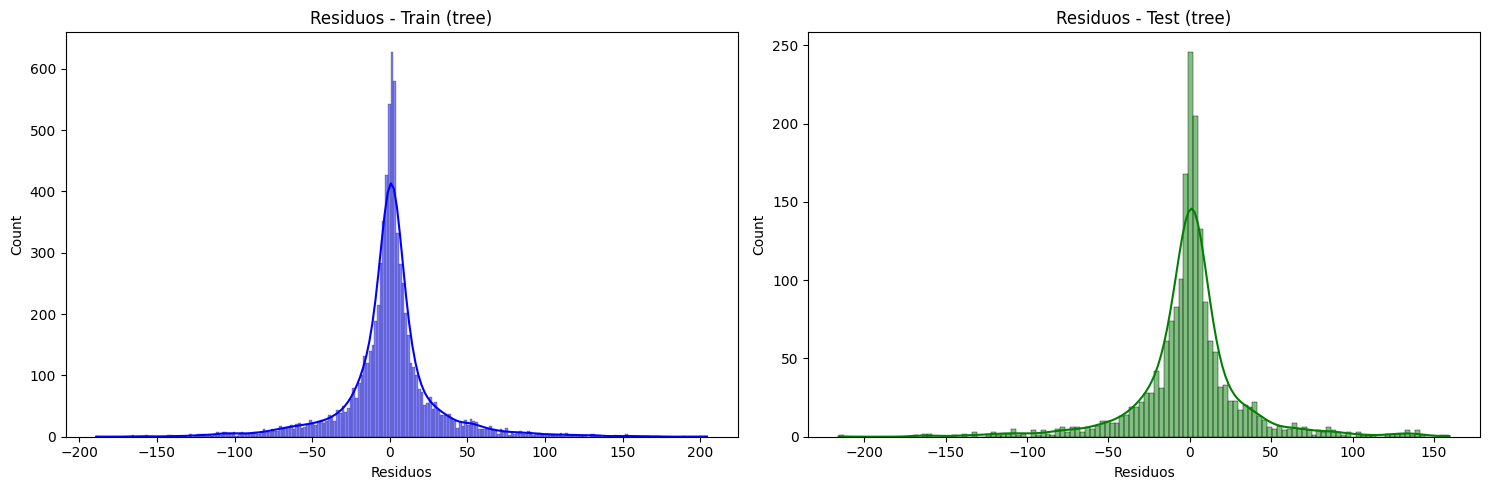

In [54]:
analisis.plot_residuos("tree")

In [55]:

analisis.calcular_metricas("tree")

,train,test
R2,0.66,0.63
MAE,18.53,19.95
MSE,972.63,"1,141.01"
RMSE,31.19,33.78


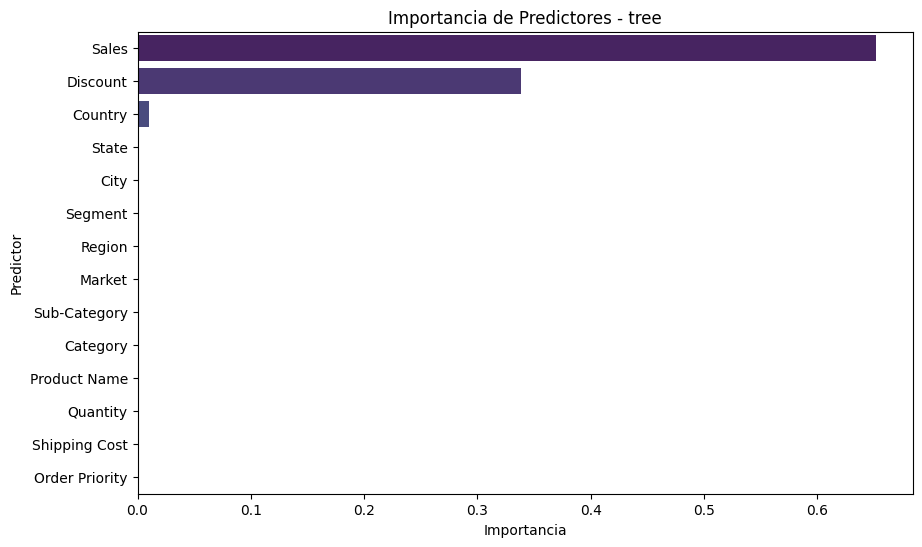

,Predictor,Importancia
9,Sales,0.65
11,Discount,0.34
3,Country,0.01
2,State,0.00
1,City,0.00
0,Segment,0.00
5,Region,0.00
4,Market,0.00
7,Sub-Category,0.00
6,Category,0.00


In [56]:
analisis.importancia_predictores("tree")

### Random Forest

In [57]:
# instanciamos la clase de regresión lineal
analisis_random_forest = sa.AnalisisModelosRegresion(dataframe=df3, variable_dependiente='Profit_vr')

params_rf = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [1], 
    'max_leaf_nodes': [30]
}

# llamamos a la función para ajustar el modelo
analisis_random_forest.ajustar_modelo(modelo='random_forest', param_grid=params_rf)

In [58]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_analisis_random_forest = analisis_random_forest.obtener_resultados()
df_resultados_analisis_random_forest.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
28543,-7.33,-23.75,Train,random_forest,16.42
27814,-16.06,-15.54,Train,random_forest,-0.52
4433,-69.97,-67.93,Train,random_forest,-2.04


In [59]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.68,0.64
MAE,18.06,19.63
MSE,918.54,"1,108.97"
RMSE,30.31,33.30


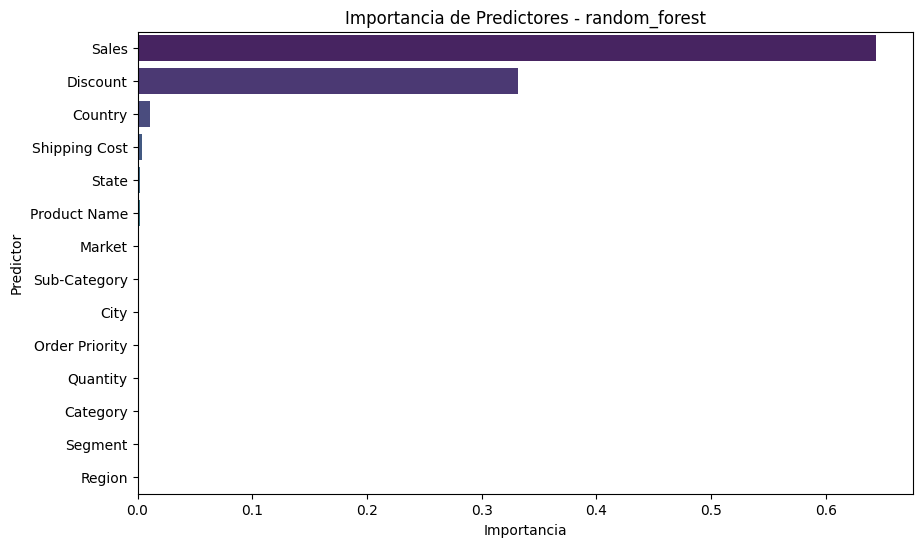

,Predictor,Importancia
9,Sales,0.64
11,Discount,0.33
3,Country,0.01
12,Shipping Cost,0.00
2,State,0.00
8,Product Name,0.00
4,Market,0.00
7,Sub-Category,0.00
1,City,0.00
13,Order Priority,0.00


In [60]:
analisis_random_forest.importancia_predictores("random_forest")


### Gradient Boost

In [61]:
# instanciamos la clase de regresión lineal
analisis_gradient_boosting = sa.AnalisisModelosRegresion(dataframe=df3, variable_dependiente='Profit_vr')

params_gb = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1,]
}

# llamamos a la función para ajustar el modelo
analisis_gradient_boosting.ajustar_modelo(modelo='gradient_boosting',param_grid = params_gb)

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient_boosting = analisis_gradient_boosting.obtener_resultados()
df_resultados_gradient_boosting.head()

,Real,Predicho,Conjunto,Modelo,Residuos
28543,-7.33,-37.62,Train,gradient_boosting,30.29
27814,-16.06,-32.91,Train,gradient_boosting,16.85
4433,-69.97,-52.90,Train,gradient_boosting,-17.07
41369,-3.13,-25.34,Train,gradient_boosting,22.21
50498,-2.97,-27.11,Train,gradient_boosting,24.14


In [62]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")


,train,test
R2,0.37,0.35
MAE,28.87,30.10
MSE,"1,809.35","1,993.83"
RMSE,42.54,44.65


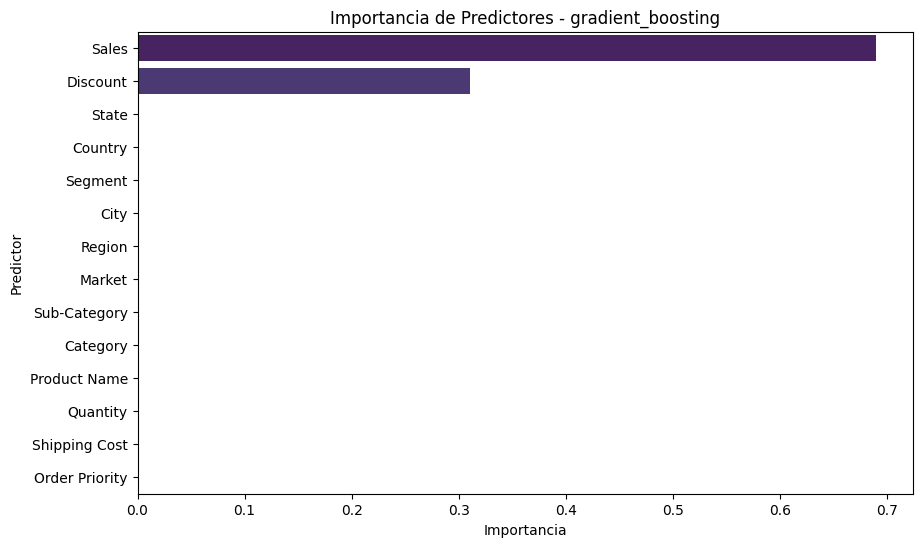

,Predictor,Importancia
9,Sales,0.69
11,Discount,0.31
2,State,0.00
3,Country,0.00
0,Segment,0.00
1,City,0.00
5,Region,0.00
4,Market,0.00
7,Sub-Category,0.00
6,Category,0.00


In [63]:
analisis_gradient_boosting.importancia_predictores("gradient_boosting")


### Xgboost

In [64]:
analisis_xgboost= sa.AnalisisModelosRegresion(dataframe=df3, variable_dependiente='Profit_vr')
params_xgb = {
    'n_estimators': [50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 2],  
    'subsample': [0.8, 1.0],        
    'colsample_bytree': [0.8, 1.0]  
}

# llamamos a la función para ajustar el modelo
analisis_xgboost.ajustar_modelo(modelo='xgboost', param_grid=params_xgb)

In [65]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = analisis_xgboost.obtener_resultados()
df_resultados_xgboost.head()

,Real,Predicho,Conjunto,Modelo,Residuos
28543,-7.33,-23.67,Train,xgboost,16.34
27814,-16.06,-17.37,Train,xgboost,1.31
4433,-69.97,-68.81,Train,xgboost,-1.16
41369,-3.13,-7.23,Train,xgboost,4.10
50498,-2.97,-4.54,Train,xgboost,1.57


In [66]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.73,0.65
MAE,16.96,19.14
MSE,792.97,"1,070.35"
RMSE,28.16,32.72


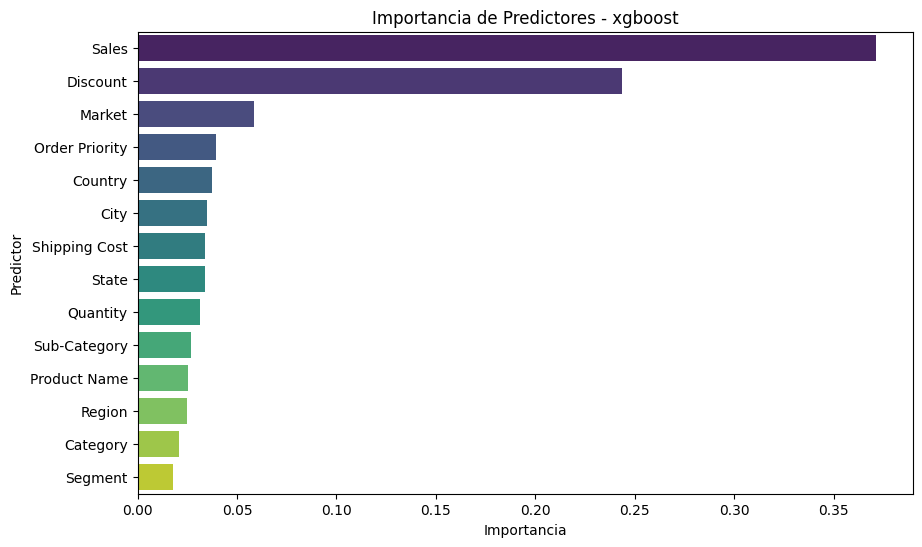

,Predictor,Importancia
9,Sales,0.37
11,Discount,0.24
4,Market,0.06
13,Order Priority,0.04
3,Country,0.04
1,City,0.04
12,Shipping Cost,0.03
2,State,0.03
10,Quantity,0.03
7,Sub-Category,0.03


In [67]:
analisis_xgboost.importancia_predictores("xgboost")


Vemos los estadísitcos de la variable respuesta para hacer la comparación con nuestra predicciones

In [70]:
df3["Profit_vr"].describe() 

count   9,648.00
mean      -37.73
std        54.05
min      -341.74
25%       -48.23
50%       -16.67
75%        -5.08
max       114.70
Name: Profit_vr, dtype: float64

Como vismo cuándo hicimos la agrupación en clusters los datos de este cluster tienen un beneficio menor (en media) que los de los otros dos clusters. el rango tambien es pequeño (151 apoximadamente). El mejor modelo es el xg boost, con un RMSE en test de 32. Las métricas son parecidas, ligeramente mejores en terminos absolutos a a las del cluter anterior, pero teniendo en cuenta que el rango de valores que toma la variable respuesta es menor, uno esperaría mayor precisión en la predicción.

## CONCLUSIONES

- Los modelos de regresión predicen mejor en los clusters 0 y 1 que en el -1. Una posible explicación es que lso datos de ese cluster sean outliers, o muchos de ellso al menos.

- Las metricas no son buenas, lo que sugiere que los clusters definidos o los modelos de predicción son mejorables

- Viendo que en todos los modelos las variables de más importancia para hacer las predicciones de beneficios son "Discount" y "Sales". habría que tratar de aumentar las ventas y minimizar los descuentos. Teniendo en cuenta que si no hay descuentos o demasiado pocos, subirán los precios lo que puede repercutir negativamente en las ventas.

- El beneficio es más bajo en los clusters 0 y 1, y es ahí donde habría que poner enfasis en mejorar los beneficios. En el -1 son bastante altos